In [1]:
import os
import altair as alt
import pandas as pd
from toolz.curried import pipe

# Create a new data transformer that stores the files in a directory
def json_dir(data, data_dir='altairdata'):
    os.makedirs(data_dir, exist_ok=True)
    return pipe(data, alt.to_json(filename=data_dir + '/{prefix}-{hash}.{extension}') )

# Register and enable the new transformer
alt.data_transformers.register('json_dir', json_dir)
alt.data_transformers.enable('json_dir')

# Handle large data sets (default shows only 5000)
# See here: https://altair-viz.github.io/user_guide/data_transformers.html
alt.data_transformers.disable_max_rows()

alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [2]:
df = pd.read_csv("Airbnb_Open_Data.csv")
df.head()

/tmp/ipykernel_1349/1754490130.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## Change Price and Service Fee to Numerical 

In [3]:
df['service fee'] = df['service fee'].astype(str).str.strip().replace({r'\$': '', ',': ''}, regex=True)
df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce') 

df['price'] = df['price'].astype(str).str.strip().replace({r'\$': '', ',': ''}, regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce') 

In [4]:
# Change to Integers but doesn't really matter
# df['service fee'] = df['service fee'].astype('Int64') 
# df['price'] = df['price'].astype('Int64') 

## Correlation Matrix

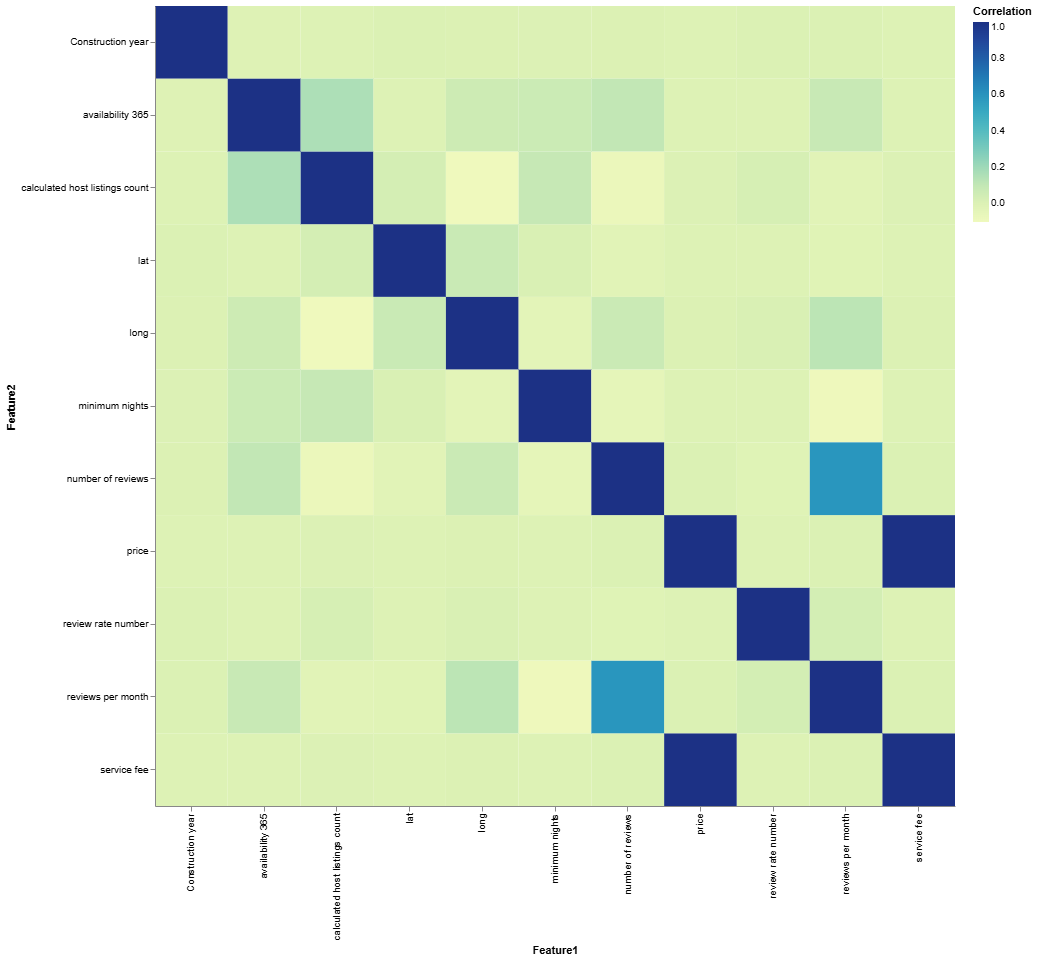

In [5]:
# Filter out non-numeric columns
numerical_df = df.select_dtypes(include=['number'])
numerical_df = numerical_df.drop(columns=['id', 'host id'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Convert the correlation matrix into a long-form DataFrame
corr_df = correlation_matrix.reset_index().melt(id_vars='index')
corr_df.columns = ['Feature1', 'Feature2', 'Correlation']

# Create the heatmap using Altair
heatmap = alt.Chart(corr_df).mark_rect().encode(
    x='Feature1:N',
    y='Feature2:N',
    color='Correlation:Q',
    tooltip=['Feature1', 'Feature2', 'Correlation']
).properties(
    width=800,
    height=800
).configure_view(
    strokeWidth=0  # Remove border around the chart
)

heatmap.show()

## New Columns for Length of NAME and house rules

In [6]:
# Create a new column for the length of the 'NAME' string
df['name_length'] = df['NAME'].str.len()

# Create a new column for the length of the 'house rules' string
df['house_rules_length'] = df['house_rules'].str.len()